In [25]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#more detailed
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans




spotify = pd.read_csv('playlist_dataset.csv', header=0)
spotify

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [26]:
#spotify.info()
missing_data_col = spotify.isnull().apply(func=sum) #verif colonnes

missing_data_row=spotify[spotify.isnull().any(axis=1)]

missing_data_row
data_spotify=spotify.dropna()
data_spotify[data_spotify.isnull().any(axis=1)]

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [27]:
#print(data_spotify.columns)
data_spotify.nunique()

playlist_url           23
year                   23
track_id             2201
track_name           2120
track_popularity       71
album                1663
artist_id             891
artist_name           891
artist_genres         698
artist_popularity      62
danceability          585
energy                641
key                    12
loudness             1897
mode                    2
speechiness           860
acousticness         1322
instrumentalness      841
liveness              807
valence               827
tempo                2074
duration_ms          2033
time_signature          4
dtype: int64

<Axes: >

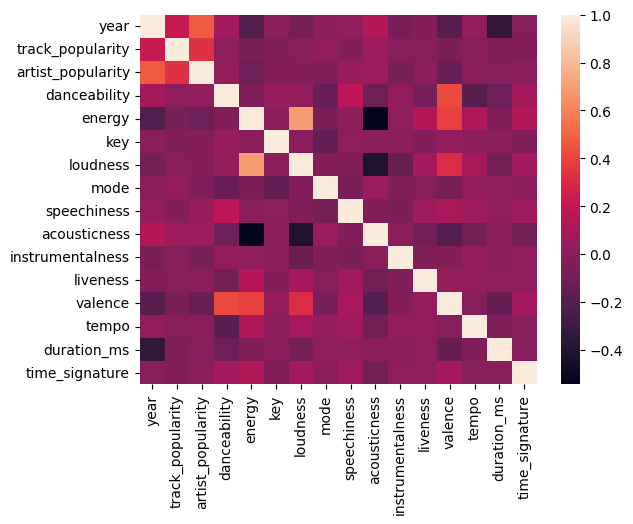

In [28]:
num_spotify=data_spotify.select_dtypes(include=[int,float])
corr=num_spotify.corr()
sns.heatmap(corr)

On remarque plusieurs corrélation qu'il va être intéressant d'analyser.
Premièrement le lien entre year et artist_popularity et surtout celui entre energy et loudness qui sont très corrélée.
Enfin la valence en lien avec la danceability, l'energy et la loudness.


## PCA

In [29]:
#centrer et reduire dataset de valeurs numériques

spotify_centered=num_spotify.sub(num_spotify.mean())
spotify_scaled=spotify_centered.div(spotify_centered.std())

pca=PCA() #crée le model pca
spotify_pca=pca.fit_transform(spotify_scaled) #fit recherche des axes de projection, transform projette les donnes sur les axes

print(pca.explained_variance_ratio_)
#print(np.cumsum(pca.explained_variance_ratio_))
#print(spotify_centered.std())

print(np.linalg.matrix_rank(spotify_scaled))



[0.16001149 0.10908133 0.0934077  0.07093521 0.07003001 0.06697755
 0.06428085 0.0599624  0.0585309  0.05117335 0.04710495 0.04235865
 0.03895702 0.02937569 0.02302662 0.01478627]
16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


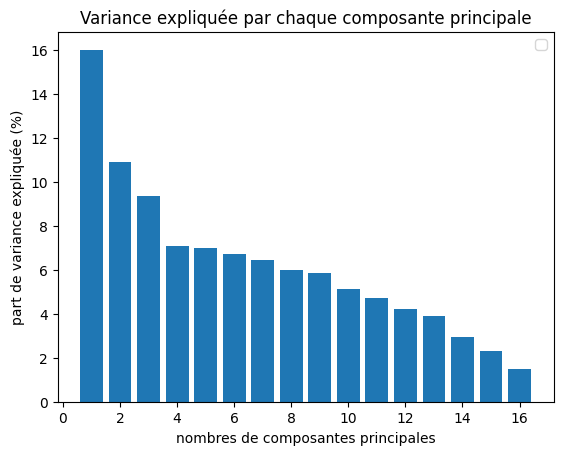

In [30]:
#affichage 
plt.figure()


# Bar chart : variance expliquée par chaque composante
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_*100)

plt.xlabel('nombres de composantes principales')
plt.ylabel('part de variance expliquée (%)')
plt.title("Variance expliquée par chaque composante principale")
plt.legend()
plt.show()

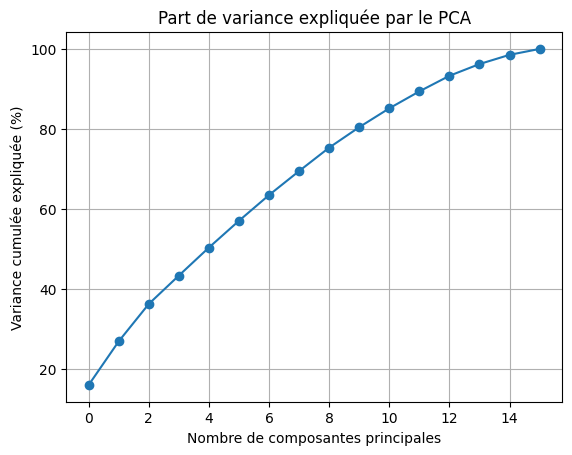

In [31]:
#pour plus de précision


plt.plot(np.cumsum(pca.explained_variance_ratio_*100), '-o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance cumulée expliquée (%)")
plt.title("Part de variance expliquée par le PCA")
plt.grid()
plt.show()


Les 3 premières dimensions permettent d'analyser environ 50% du dataset

### PCA1 et PCA2

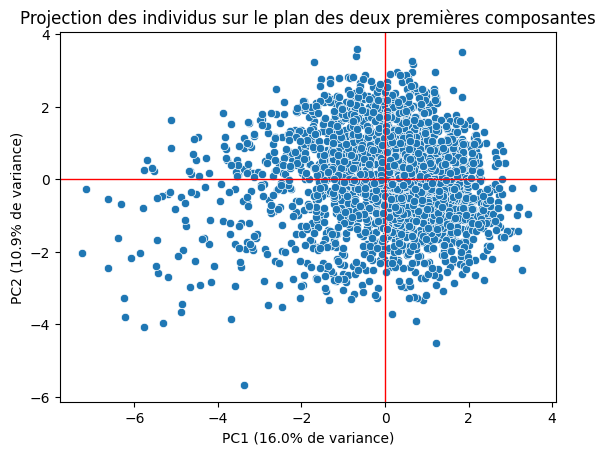

In [32]:

#affichage du nuage de points selon les 2 premières composantes
plt.figure()
pca_df=pd.DataFrame(spotify_pca,columns=[f"PC{i+1}" for i in range(spotify_pca.shape[1])])

sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title("Projection des individus sur le plan des deux premières composantes")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% de variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% de variance)")
plt.axhline(0, color='red', lw=1)
plt.axvline(0, color='red', lw=1)
plt.show()


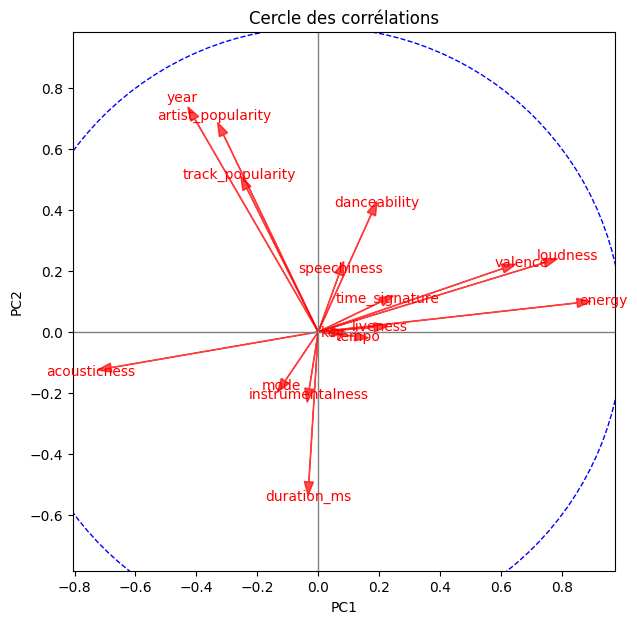

In [33]:
#affichage du cercle des corrélations

# Coordonnées des variables dans l’espace des composantes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(7,7))
for i, var in enumerate(spotify_scaled.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              color='r', alpha=0.7, head_width=0.03)
    plt.text(loadings[i,0]*1.1, loadings[i,1]*1.1, var, color='r', ha='center', va='center')

# Cercle unité
circle = plt.Circle((0,0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle des corrélations")
plt.axis('equal')
plt.show()

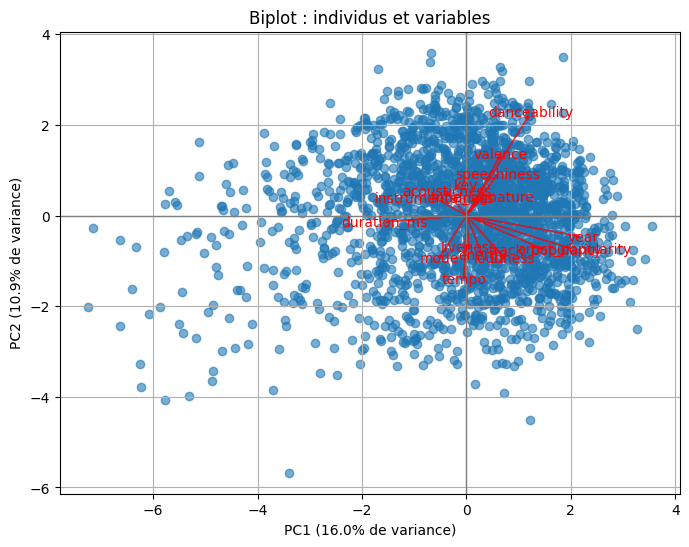

In [34]:
# superposer les 2 
plt.figure(figsize=(8,6))

# --- Points (individus)
plt.scatter(spotify_pca[:,0], spotify_pca[:,1], alpha=0.6)

# --- Flèches (variables)
for i, var in enumerate(spotify_scaled.columns):
    plt.arrow(0, 0, loadings[i,1]*3, loadings[i,2]*3, color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings[i,1]*3.2, loadings[i,2]*3.2, var, color='r', ha='center', va='center')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% de variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% de variance)")
plt.title("Biplot : individus et variables")
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.show()


On retrouve les mêmes corrélations que dans la heatmap, valence, loudness et energy sont très correllées et très bien représenté sur ces 2 dimensions. \
De même pour year et artist_popularity.

Pour l'analyse, 
- l'axe 1 (PC1) semble être en lien avec l'energy et l'ambiance générée par la musique (plus les points sont à droite et plus les musiques sont énergiques). Il semble donc avoir une opposition entre l'energie et l'aspect acoustique d'une musique.

- L'axe 2 (PC2) semble correspondre à la popularité en général que soit de l'artiste ou de la musique. Donc plus une musique est haute sur l'axe 2 plus elle et son artiste sont populaires. \
Attention tout de même puisque l'axe 2 n'est pas entièrement corrélé avec la popularité, la plus grande corrélation se fait avec le duration_ms donc l'axe va plus correspondre à l'évaluation des durées des musiques mais en lien fort avec leurs popularités.

Concernant les points, on peut voir qu'ils sont répartis de manière assez uniforme autour du centre. Il y a donc une diversité de musique sur le plan energie, acoustique et popularité. \
On remarque cependant qu'il y a des musiques avec des qualifiées de très peu énergiques par rapport aux autres.


## Résumé des différents axes :
en premier les  valeurs les plus élevées et en deuxième les valeurs faibles

PC3 : danceability-tempo \
PC4 : mode - key, speechiness \
PC5 : key, instrumentalness - duration_ms, speechiness \
PC6 : tempo, speechiness - duration_ms, track_popularity \
PC7 : instrumentalness \
PC8 : liveness \
PC9 : time_signature \
PC10 : mode, key \
PC11 : track popularity (un peu loin de l'axe) \
PC12 : speechiness, track_popularity (un peu loin) - duration, tempo (tout mal représenté)

Et là je m'arrête parce qu'on a 90% du dataset

### CLustering

In [51]:
#clustering sur le dataset spotify numérique
#test avec 4 clusters
kmeans_raw=KMeans(n_clusters=4,random_state=0)
clusters_raw=kmeans_raw.fit_predict(spotify_scaled)
score_raw=silhouette_score(spotify_scaled, clusters_raw)


#pour le pca à 90%
pca_90=PCA(n_components=0.9) #on prend seulement les composantes qui permettent d'étudier 90%
spotify_pca_90=pca_90.fit_transform(spotify_scaled)

kmeans_pca=KMeans(n_clusters=4, random_state=0)
clusters_pca=kmeans_pca.fit_predict(spotify_pca_90)
score_pca=silhouette_score(spotify_pca,clusters_pca)


print("score_raw:",score_raw)
print("score_pca:", score_pca)

#data_spotify["cluster"]=clusters

score_raw: 0.07596268772898859
score_pca: 0.0794368617965924


Les silhouettes sont très proche de 0 donc 4 clusters n'est pas du tout un chiffre pertinent pour évaluer les données. Tout de même avec 4 clusters on obtient une meilleur silhouette avec le clustering fait sur le pca donc il est plus pertinent de considérer le pca pour le clustering mais nous allons tout de même vérifier en comparant les silhouettes de clusters entre 2 et 10 pour les 2

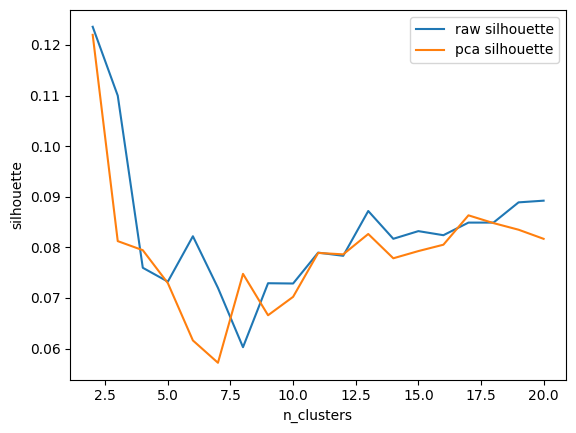

mean_S_raw: 0.08329732530778859
mean_S_pca 0.07894789007778547


In [ ]:
#comparaison clusters
S_raw=[] # liste des silhouettes rax
S_pca=[]

for n_clusters in range(2,21):

    kmeans_raw=KMeans(n_clusters=n_clusters,random_state=0)
    clusters_raw=kmeans_raw.fit_predict(spotify_scaled)
    score_raw=silhouette_score(spotify_scaled, clusters_raw)

    kmeans_pca=KMeans(n_clusters=n_clusters, random_state=0)
    clusters_pca=kmeans_pca.fit_predict(spotify_pca_90)
    score_pca=silhouette_score(spotify_pca,clusters_pca)

    S_raw.append(score_raw)
    S_pca.append(score_pca)

plt.figure()
plt.plot([i for i in range(2,21)], S_raw, label="raw silhouette")
plt.plot([i for i in range(2,21)], S_pca, label="pca silhouette")
plt.xlabel("n_clusters")
plt.ylabel('silhouette')
plt.legend()
plt.show()

#moyenne des silhouettes
mean_S_raw=np.array(S_raw).mean()
mean_S_pca=np.array(S_pca).mean()

print("mean_S_raw:", mean_S_raw)
print("mean_S_pca",mean_S_pca)

Bon là le clustering est juste pas fou... en moyenne les clusters du dataset de base sont meilleurs que ceux fait à partir du pca